# Global Power Plant Database


# Importing necessary libraries


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset


In [118]:
# Loading dataset from csv file to dataframe
df = pd.read_csv('global power plant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains the records 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). The dataset has more than 25 variables including the features and target variables. In this dataset, we need to predict "primary_fuel" and "capacity_mw", so these two are our target variables.

# Exploratory Data Analysis(EDA)


In [119]:
# Checking hte dimension of dataset
df.shape

(907, 27)

There are 907 rows and 27 columns in this dataset



In [120]:
# Checking the columns details
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [121]:
# Checking the dtypes of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The dataset has 15 float datatype i.e numeric data variables and 12 object datatype i.e categorical data variables



Numerical variables -

1. capacity_mw
2. latitude
3. longitude
4. other_fuel3
5. commissioning_year
6. wepp_id
7. year_of_capacity_data
8. generation_gwh_2013
9. generation_gwh_2014
10. generation_gwh_2015
11. generation_gwh_2016
12. generation_gwh_2017
13. generation_gwh_2018
14. generation_gwh_2019 
15. estimated_generation_gwh

Categorical variables -

1. country
2. country_long
3. name
4. gppd_idnr
5. primary_fuel
6. other_fuel1
7. other_fuel2
8. owner
9. source
10. url
11. geolocation_source
12. generation_data_source

In [122]:
# Checking the good overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The info methods provides the good overview of dataset which includes index range, no-null values,column type, datatypes and memory usage.



In [123]:
# Checking for unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

These are the numbers of unique values present in each column.



Here the columns country, country_long, other_fuel2,year_of_capacity_data and generation_data_source have only one unique value. Also other_feul3, wepp_id,generation_gwh_2013 ,generation_gwh_2019 , estimated_generation_gwh have no unique values which means they are filled with only NAN values.We can drop these columns.



# Feature Selection


In [124]:
# Checking the count of the country
df['country'].value_counts()

IND    907
Name: country, dtype: int64

There is only one country in the dataset so we can drop this as it is irrelevant column for prediction.



In [125]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)


In [126]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2","generation_gwh_2013","generation_gwh_2019","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)


In [127]:
# Checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Name column has unique names for each power plant so we can drop this column.



In [128]:
# Dropping name column
df.drop("name",axis=1,inplace=True)

In [129]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.



In [130]:
df.drop("gppd_idnr",axis=1,inplace=True)


The column owner has more than 65% null values. /so we can drop this column as it is irrelevant.



In [131]:
df.drop("owner",axis=1,inplace=True)


We can drop the column url also.



In [132]:
df.drop("url",axis=1,inplace=True)


So we have almost dropped all the columns which were irrelevant.



# Missing Values


In [133]:
# Checking for null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

We can see huge number of missing values.We will fill them using imputation techniques after checking skewness in these columns.



# Visualizing null values using heatmap


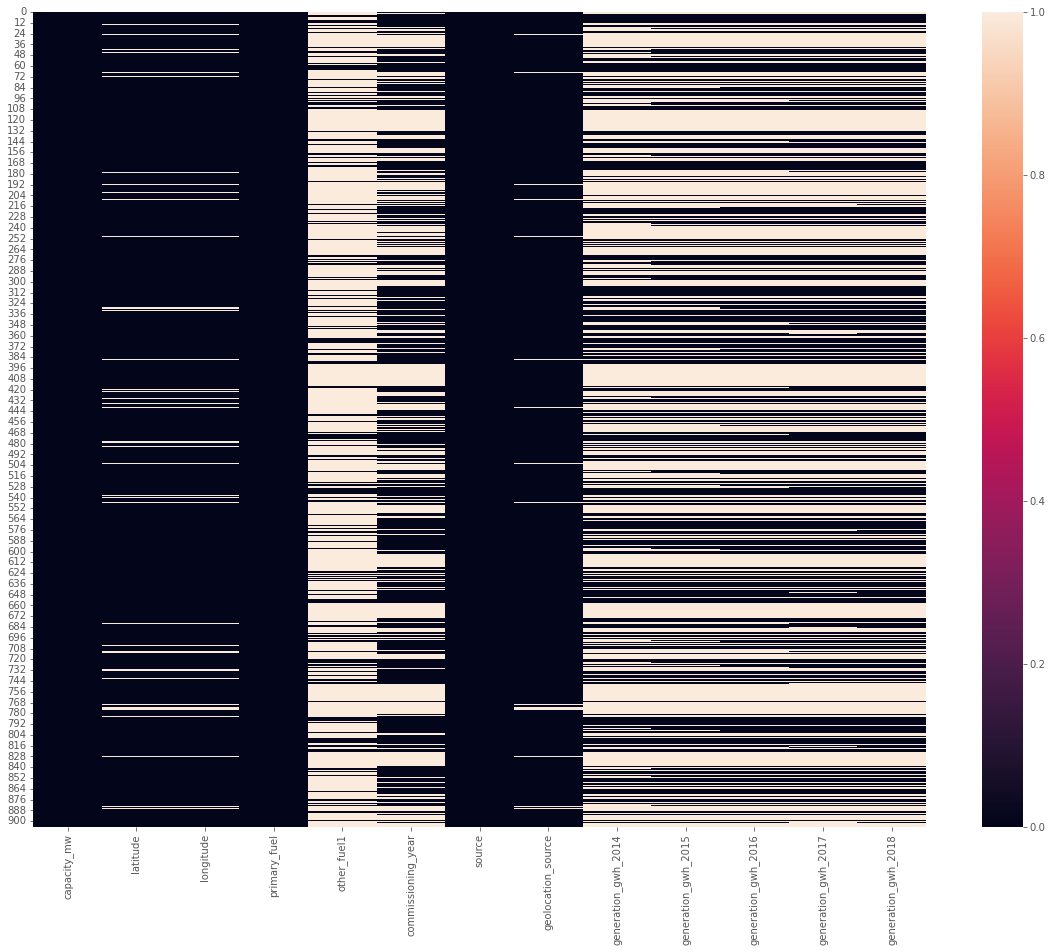

In [134]:
# Checking for missing data using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull())
plt.show()

We can clearly observe the while lines in the heatmap which represents the missing values in the dataset.



# Handling Null values


In [135]:
# Ckecking skewness before handling missing data
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

1. Most of the columns have missing values except target and features.
2. The columns longitude, commissioning year, generation_gwh_2018, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness,so will replace these columns with median.

In [136]:
# Filling null values using their median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

The column latitude has numerical data and has no skewness and outliers so we can use mean method.



In [137]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())


The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode methos.



In [138]:
# let's check the mode of other_fuel1 
df["other_fuel1"].mode()  # we will fill the null values using its mode

0    Oil
Name: other_fuel1, dtype: object

In [139]:
# let's check the mode of geolocation_source columns
df["geolocation_source"].mode()  # we will fill the null values using its mode

0    WRI
Name: geolocation_source, dtype: object

In [140]:
# Replacing the null valuee by its mode Oil
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [141]:
# Filling null values by its mode WRI
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

Now we have removed the null values using imputaion methods and the data is now clean. So we can move further.



<AxesSubplot:>

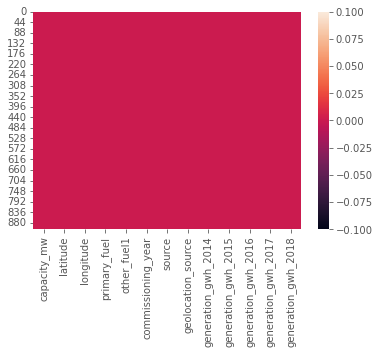

In [142]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can visulaize no missing data left in the datset.



In [143]:
# Checking the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

These are the columns present in the dataset.



In [144]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

These are the unique counts present in capacity_mw column.



In [145]:
# Checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

These are the list of values in the column primary_fuel.



In [146]:
# Checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are the unique classes present in the primary_fuel column.



In [147]:
# Checking the list of values of Commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

These are the counts of commissioning years of the power plants. Lets do some feature engineering on this column.



In [148]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2020
df['Power_plant_age'] = 2020 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old the power plants are.



In [151]:
# Lets check th dataframe after feature engineering
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0


In [152]:
# Checking whether the datset contains any space
df.loc[df['capacity_mw']== " "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


There are no spaces in the dataset.



# Description of Dataset


In [153]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,21.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,19.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,22.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,93.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect as there is no negative/invalid values present.

From the above description we can observe the following things.

1. The counts of the columns are same which means there are no missing values present in the dataset.
2. The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
3. The median is bit greater than the mean in the column latitude which means it is skewed to left.
4. From the difference between the max and 75% percentile we can say that there are huge outliers present in most of the columns, will remove them before model building.
5. The minimum count of the Power plant is zero and maximum is 4760 and there is huge difference in mean and std.

# Separating categorical and numerical columns


In [154]:
# Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


These are the categorical columns in the given dataset.



In [155]:
# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


These are the numerical columns in the dataset.



# Data Visualization


# Univariate Analysis


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


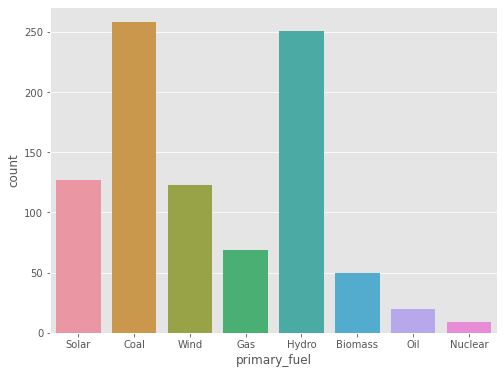

In [156]:
# Visualizing the types of fuel in primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show()

The count plot shows the energy source used in primary electricity generation. Here using the source Coal(thermal) generates more electricity followed by Hydro(water). Also the energy source Nuclear generates very less electricity compare to others. The data is not balanced so will balance the data later.



Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


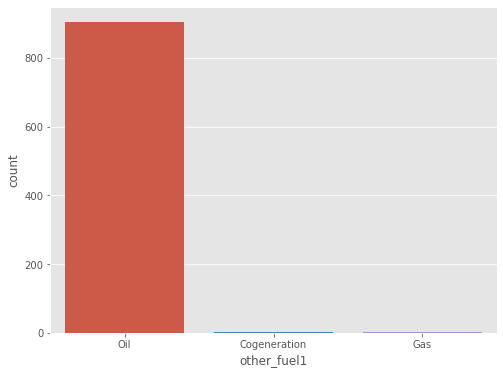

In [158]:
# Visualizing the types of fuel in other_fuel1
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

There are 3 unique values in other_fuel1. Here as we can see the count of oil is high compare to Cogeneration and Gas.



WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


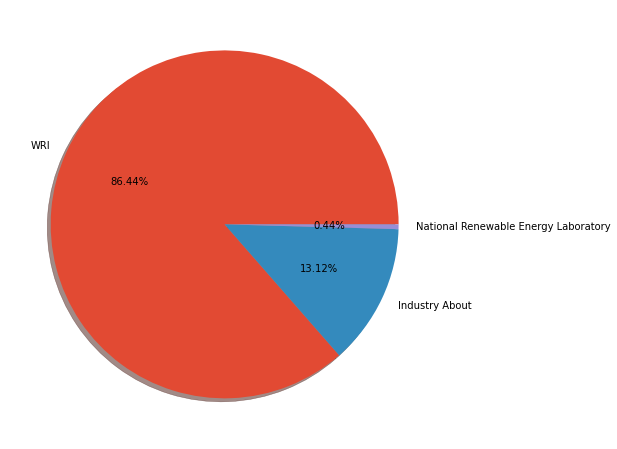

In [159]:
# Visualizing the counts of geolocation_source
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As the plot shows the geological source World Resources Institute(WRI) has highest counts which means WRI gives the more geological information compare to other two sources.

# Distribution of Skewness


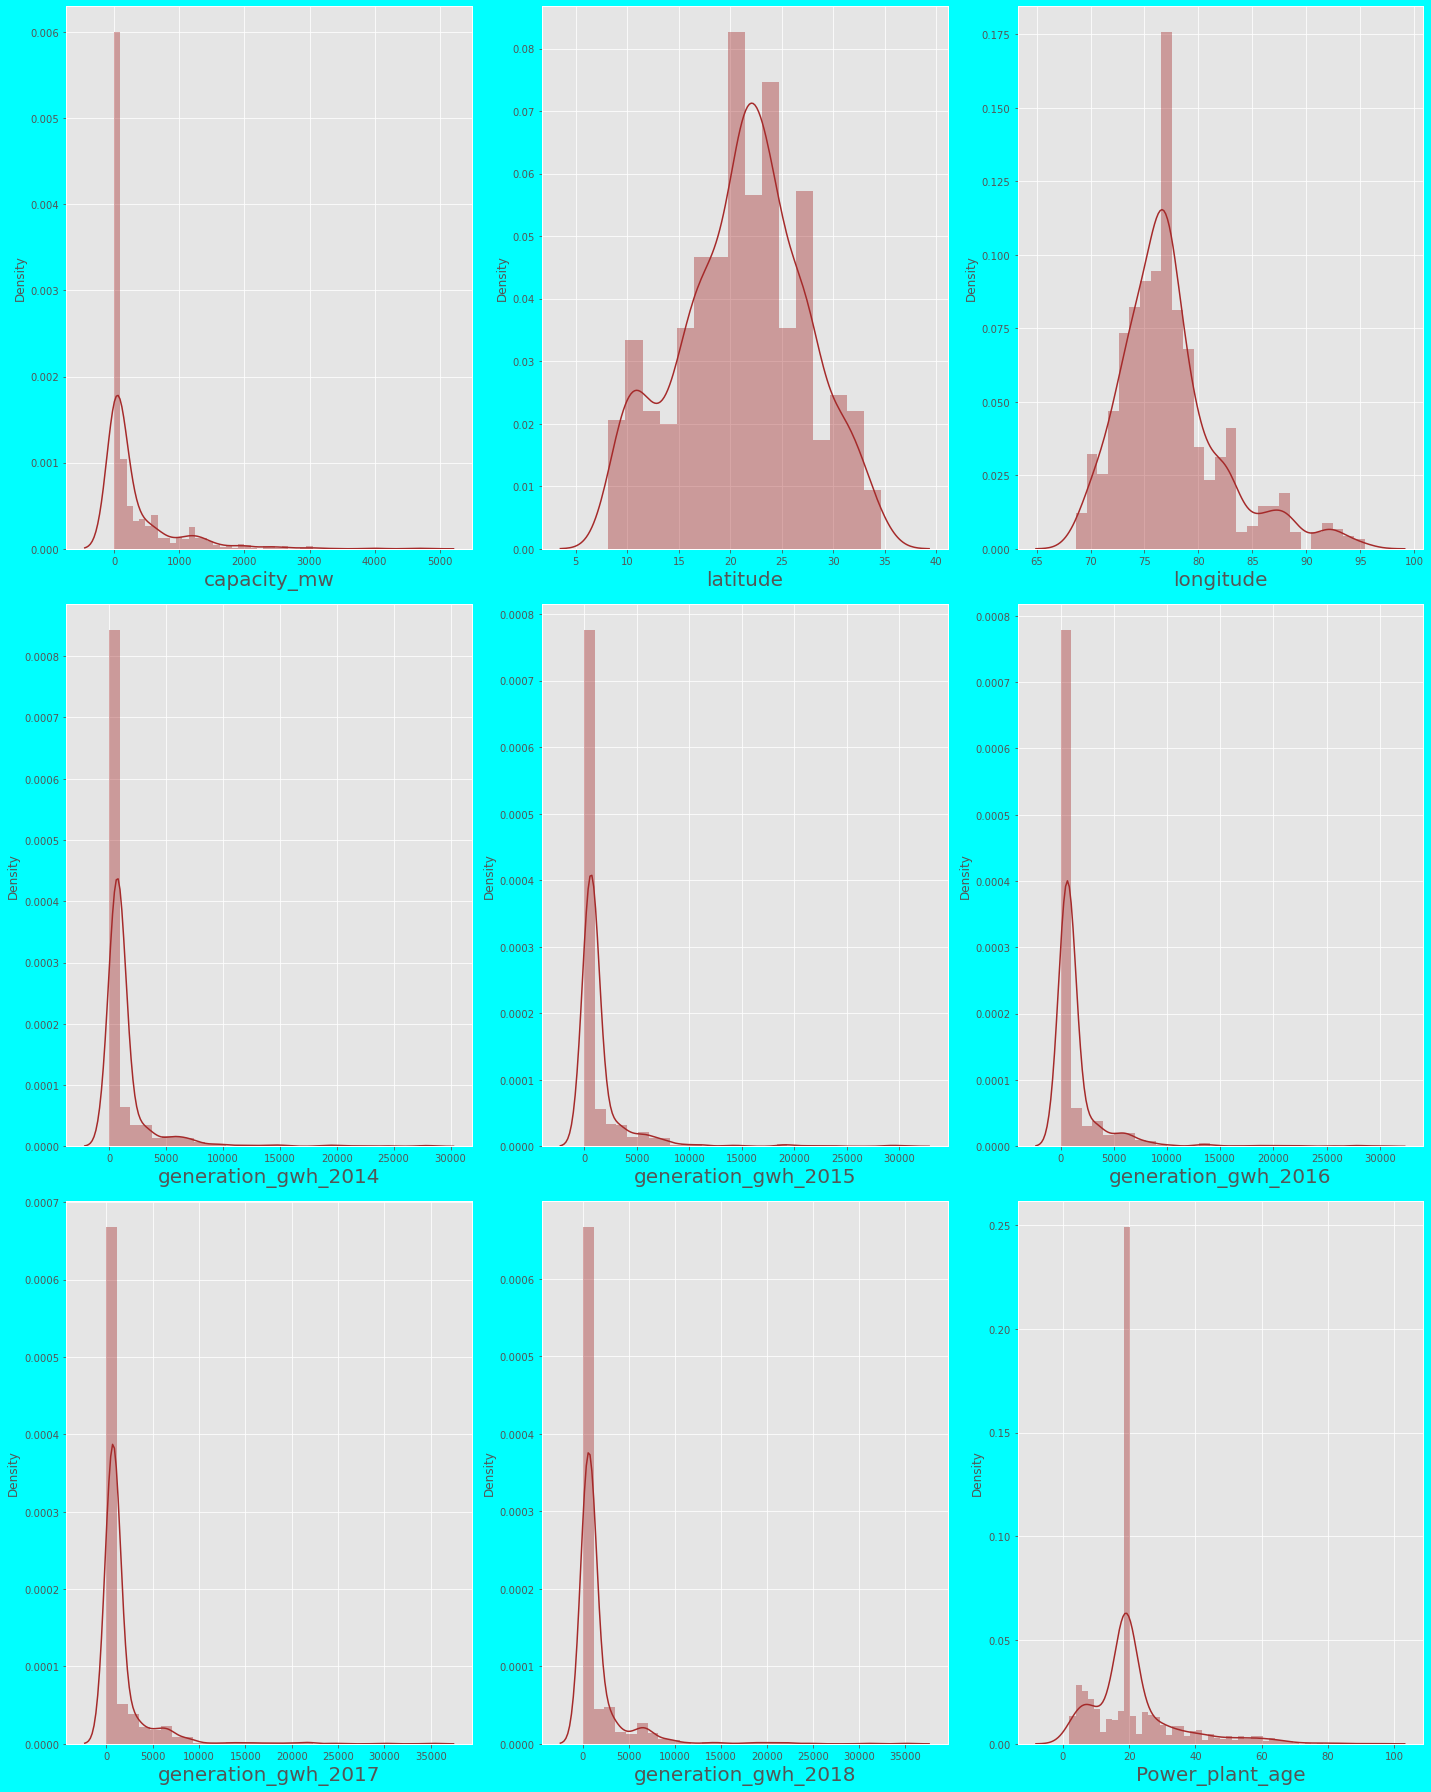

In [160]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='cyan')
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='brown')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

1. From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
2. In most of the columns the mean is greater than the median which means they are skewed to right.
3. We will remove the skewness in all these columns except the label later.

# Bivariate Analysis


# Comparing target variable capacity_mw with features


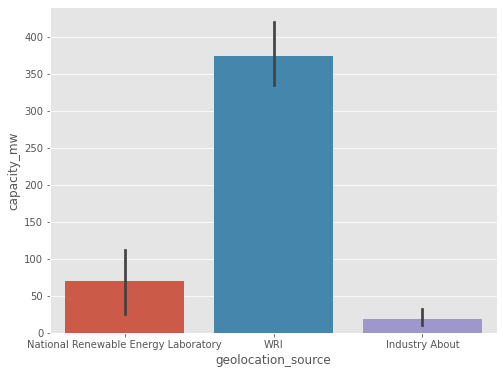

In [161]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.



<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

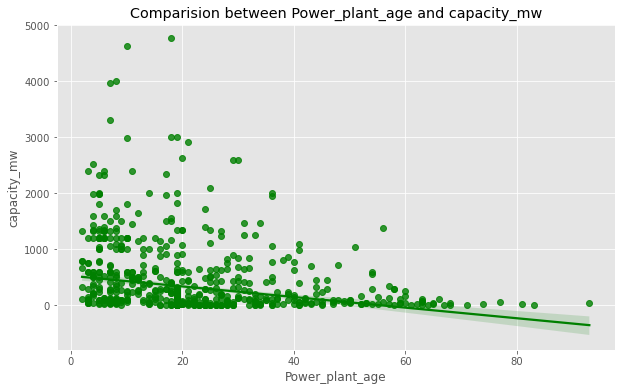

In [162]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

From the plot we can observe that there is negative linear relationship between feature and label. We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

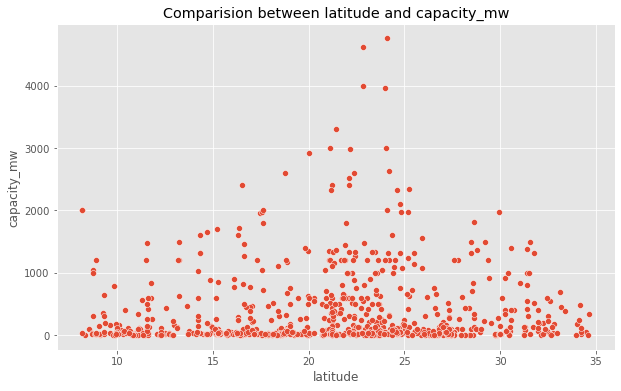

In [163]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

The plot shows that there is no linear relation between latitude and capacity of the power plant.



<AxesSubplot:title={'center':'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

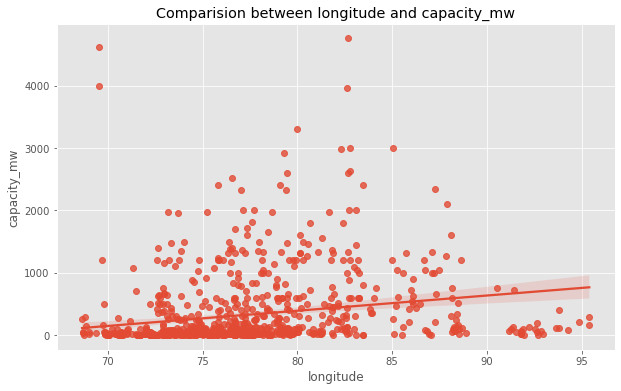

In [164]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"])

There is a weak linear relation between longitude and capacity.



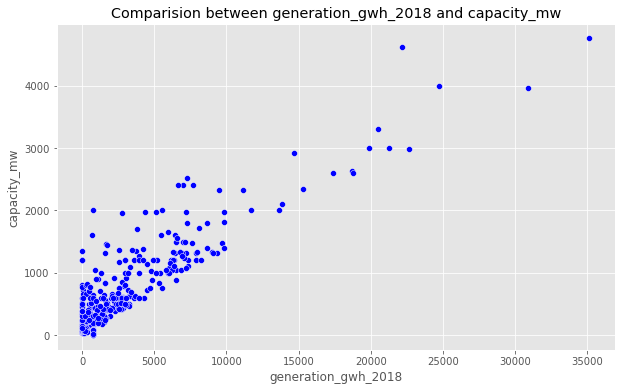

In [165]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2018 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = df,color="b")
plt.show()

We can notice the linear relationship between the feature and the label. Here the electricity generation reported for the year 2013 has capacity above 1000mw. As the generation growth increases, the capacity of plant also increases.

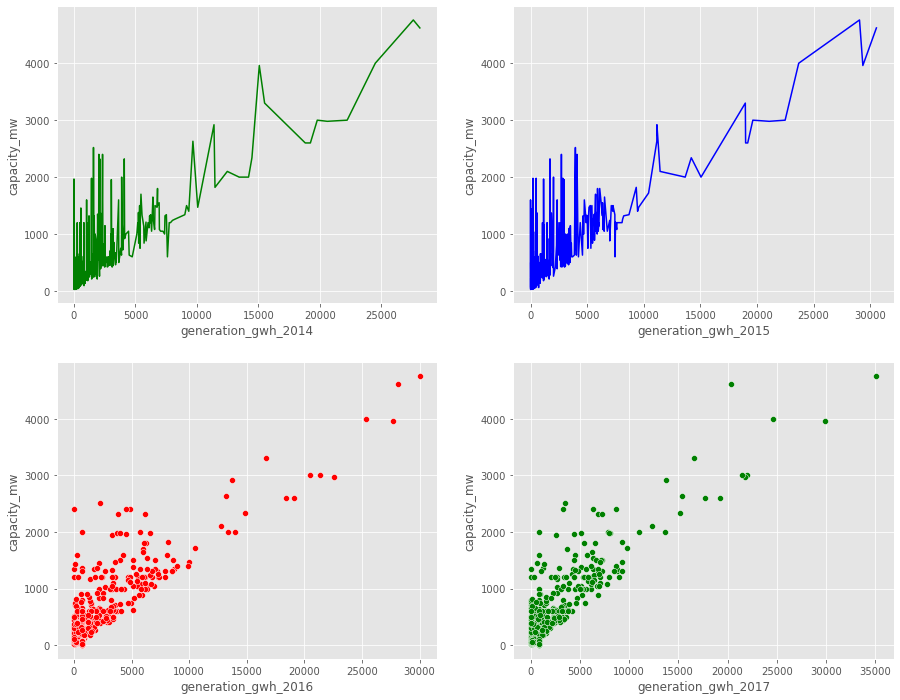

In [166]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="r")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()


From the above plots we can observe

1. There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
2. The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
3. As the electricity generation growth increases, the capacity of plant also increases.

# Comparing target variable Primary_fuel with other features


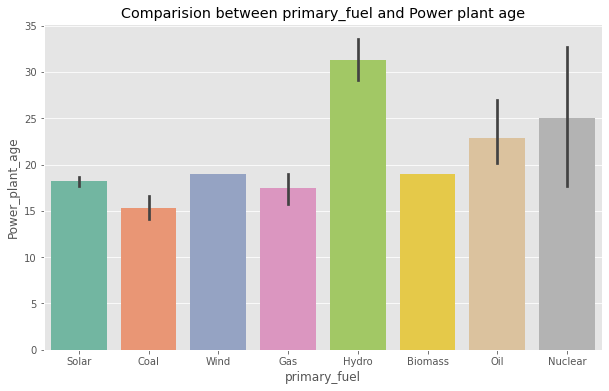

In [167]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

1. From the plot we can observe that most of old power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
2. The power plants which are recently constructed uses coal, Solar and Gas to generate the Power.

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='primary_fuel', ylabel='latitude'>

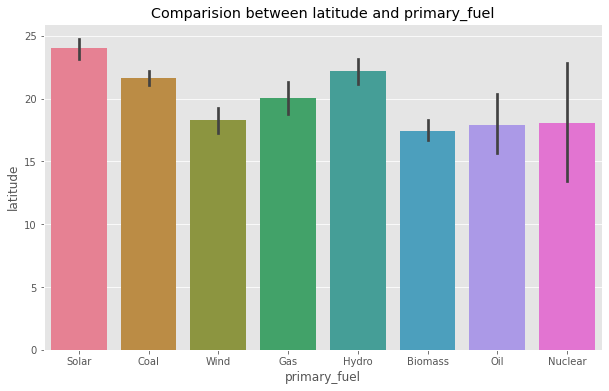

In [168]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl")

The primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas.Whereas other fuels have less latitude.m



<AxesSubplot:title={'center':'Comparision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

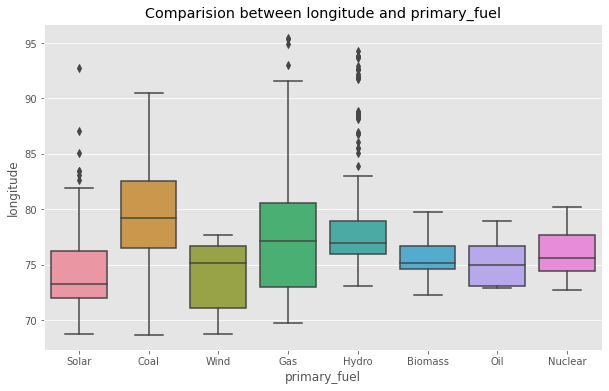

In [169]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'],df["longitude"])

The primary_fuel Gas has high longitude followed by Hydro, Solar and Coal. Other fuels have less longitude.



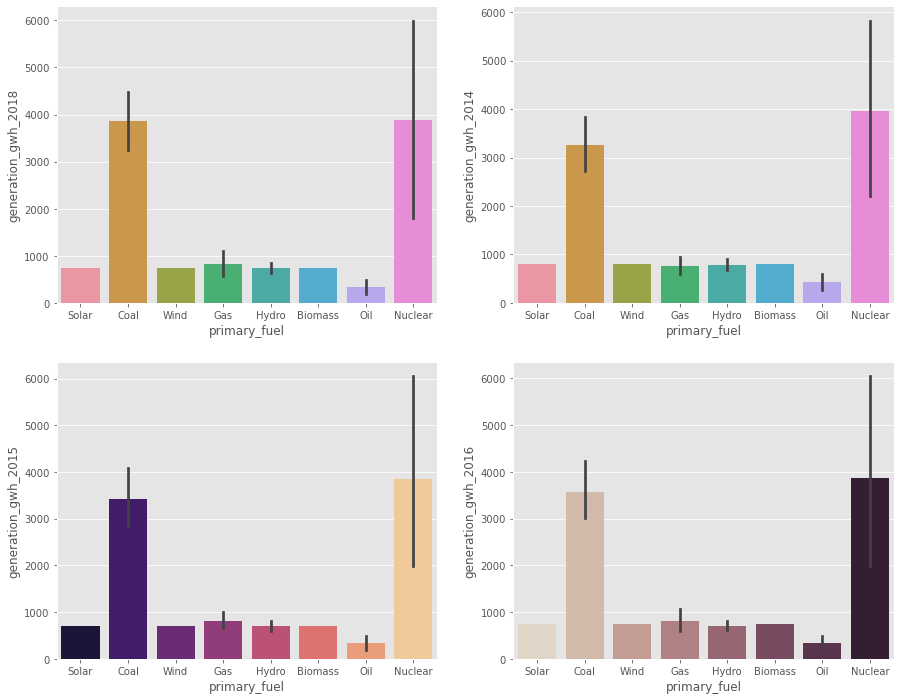

In [170]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="magma")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

1. From the graph we can notice the primary fuel Nuclear has high electrical generation reports for all the years followed by Coal.
2. Other fuel types have very less power generation reports.

# Checking the relation between targets


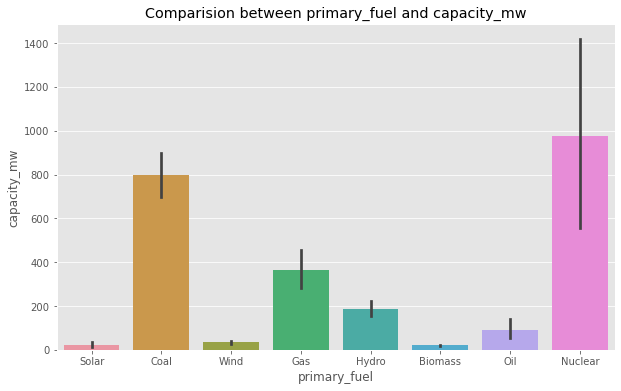

In [171]:
#Lets check the relation between primary_fuel and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

1. The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
2. Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Multivariate Analysis


Since we have two target variables capacity_mw and primary_fuel, we will check the pairwise relation for the features with both the targets separately.



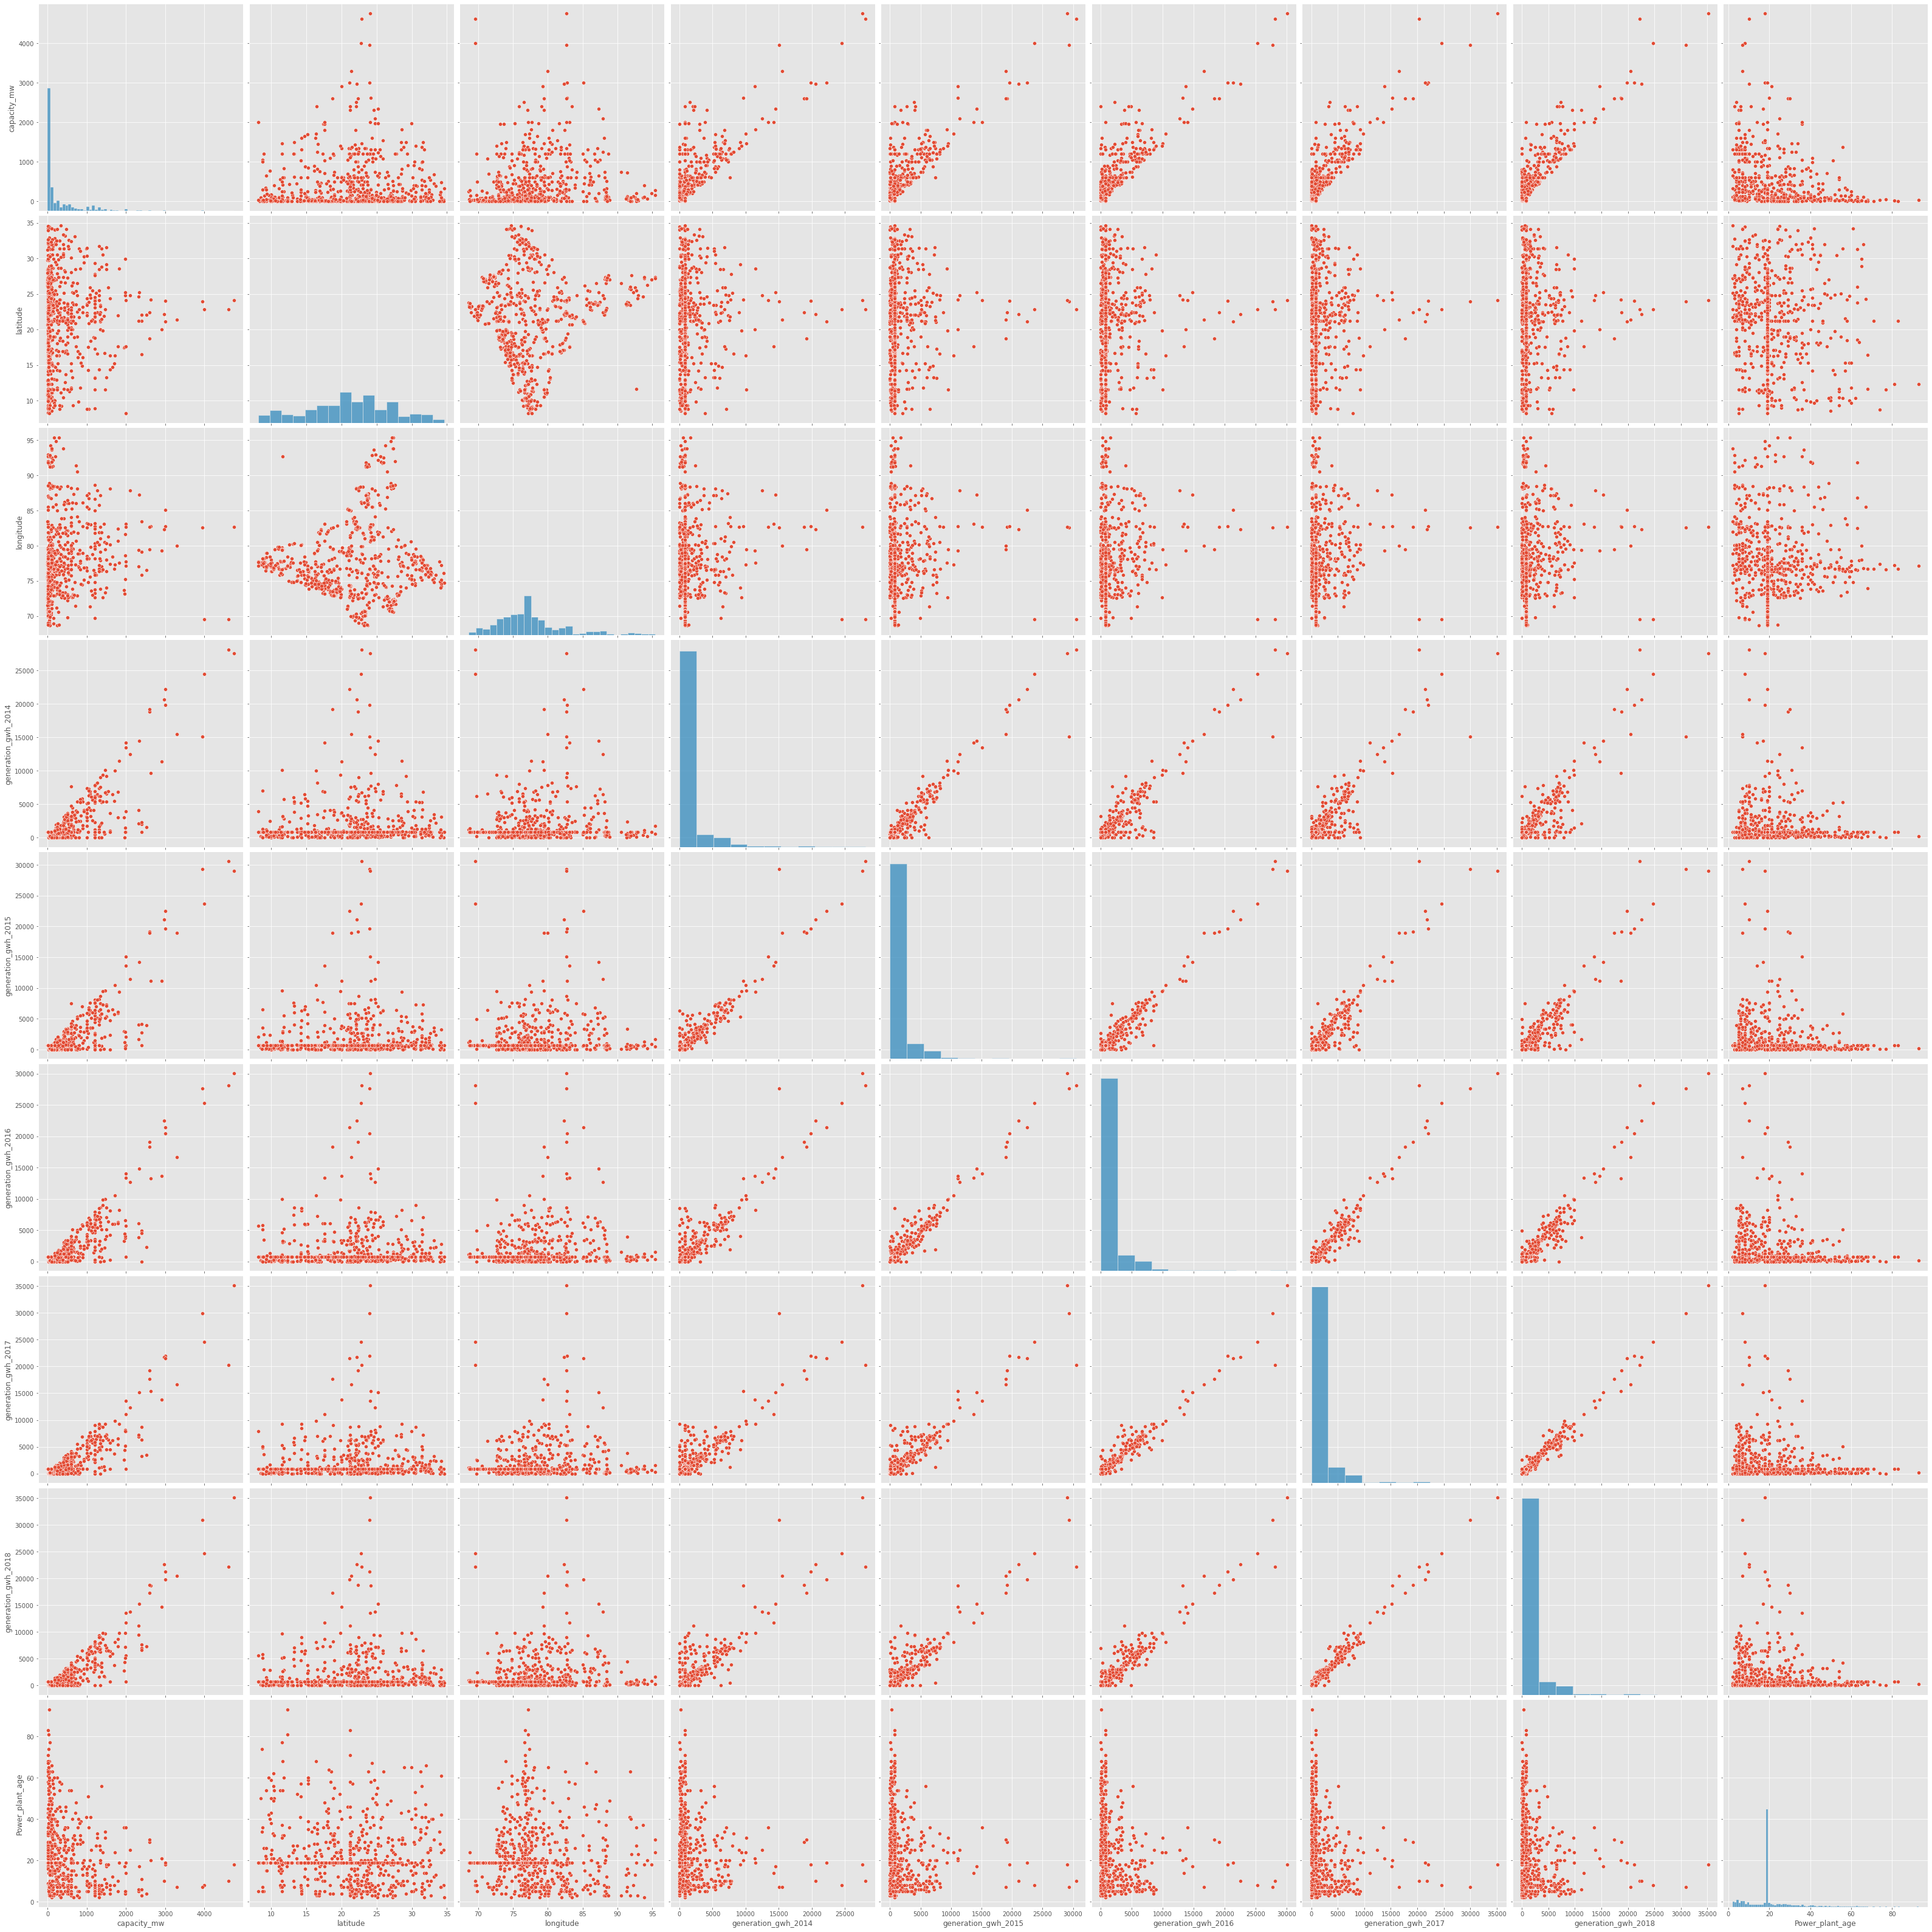

In [172]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df, size=5)

1. This pairplot gives the pairwise relation between the columns which is plotted on the basis of target variables.
2. Most of the features have strong linear relationship and correlation with each other.
3. From the plot we can observe the outliers in some of the columns and on the diagonal we can notice the distribution plot.

# Checking for Outliers


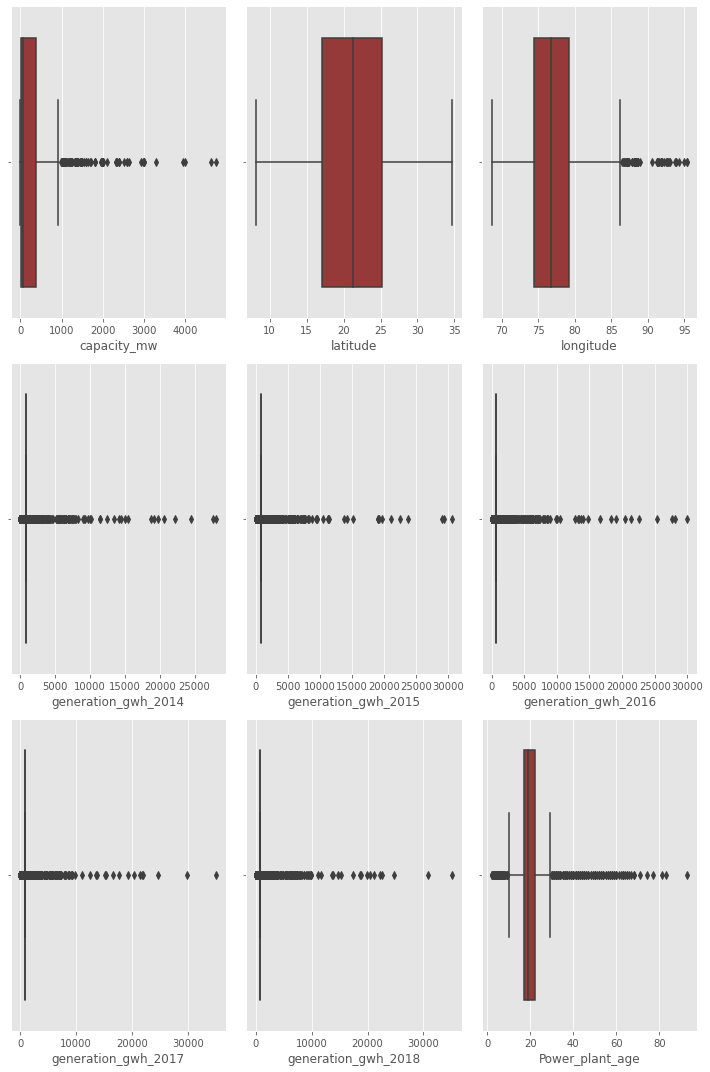

In [173]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(10,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='brown')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can observe outliers present in all columns except latitude. Even the target column has outliers but no need to remove it.



# Removing outliers


# Zscore method


In [174]:
# Features having outliers
features = df[['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]


In [177]:
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.array(zscore(features))
z

array([[-0.86991672, -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.93307603],
       [-0.58558978, -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.17269871],
       [-1.67356683, -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.17269871],
       ...,
       [-0.38359152, -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.17269871],
       [-0.76456427, -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.17269871],
       [ 0.0103269 , -0.28839399, -0.25702178, ..., -0.27573671,
        -0.27556459, -0.17269871]])

Now the outliers have been removed.



In [178]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,4.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0


This is the new dataframe after removing outliers.



In [179]:
# Checking the dimensions of both the dataframes
print(df.shape)
print(new_df.shape)

(907, 13)
(851, 13)


In [180]:
loss = (908-852)/908*100
loss

6.167400881057269

Using zscore method, the data loss is 6.16%. Lets check using IQR.



# IQR(Inter Qunatile Range) method


In [181]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd quantile
Q3 = features.quantile(0.75)

# IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

Here we have removed outliers using IQR.



In [182]:
# Checking the dimensions of dataframes
print(df.shape)
print(df1.shape)

(907, 13)
(420, 13)


# Data loss using IQR


In [183]:
loss = (908-422)/908*100
loss

53.524229074889874

Using IQR method,the data loss is more i.e 53%. So we will consider Zscore method.



# Encoding the categorical columns using Label Encoding


In [184]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']


In [185]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [186]:
new_df[categorical_col]


,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


This is the dataframe after encoding the categorical columns.



# Correlation


In [188]:
# Checking the correlation between features and label
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


corr() method states the correlation between the dependent and independent variables.



# Correlation matrix using heatmap


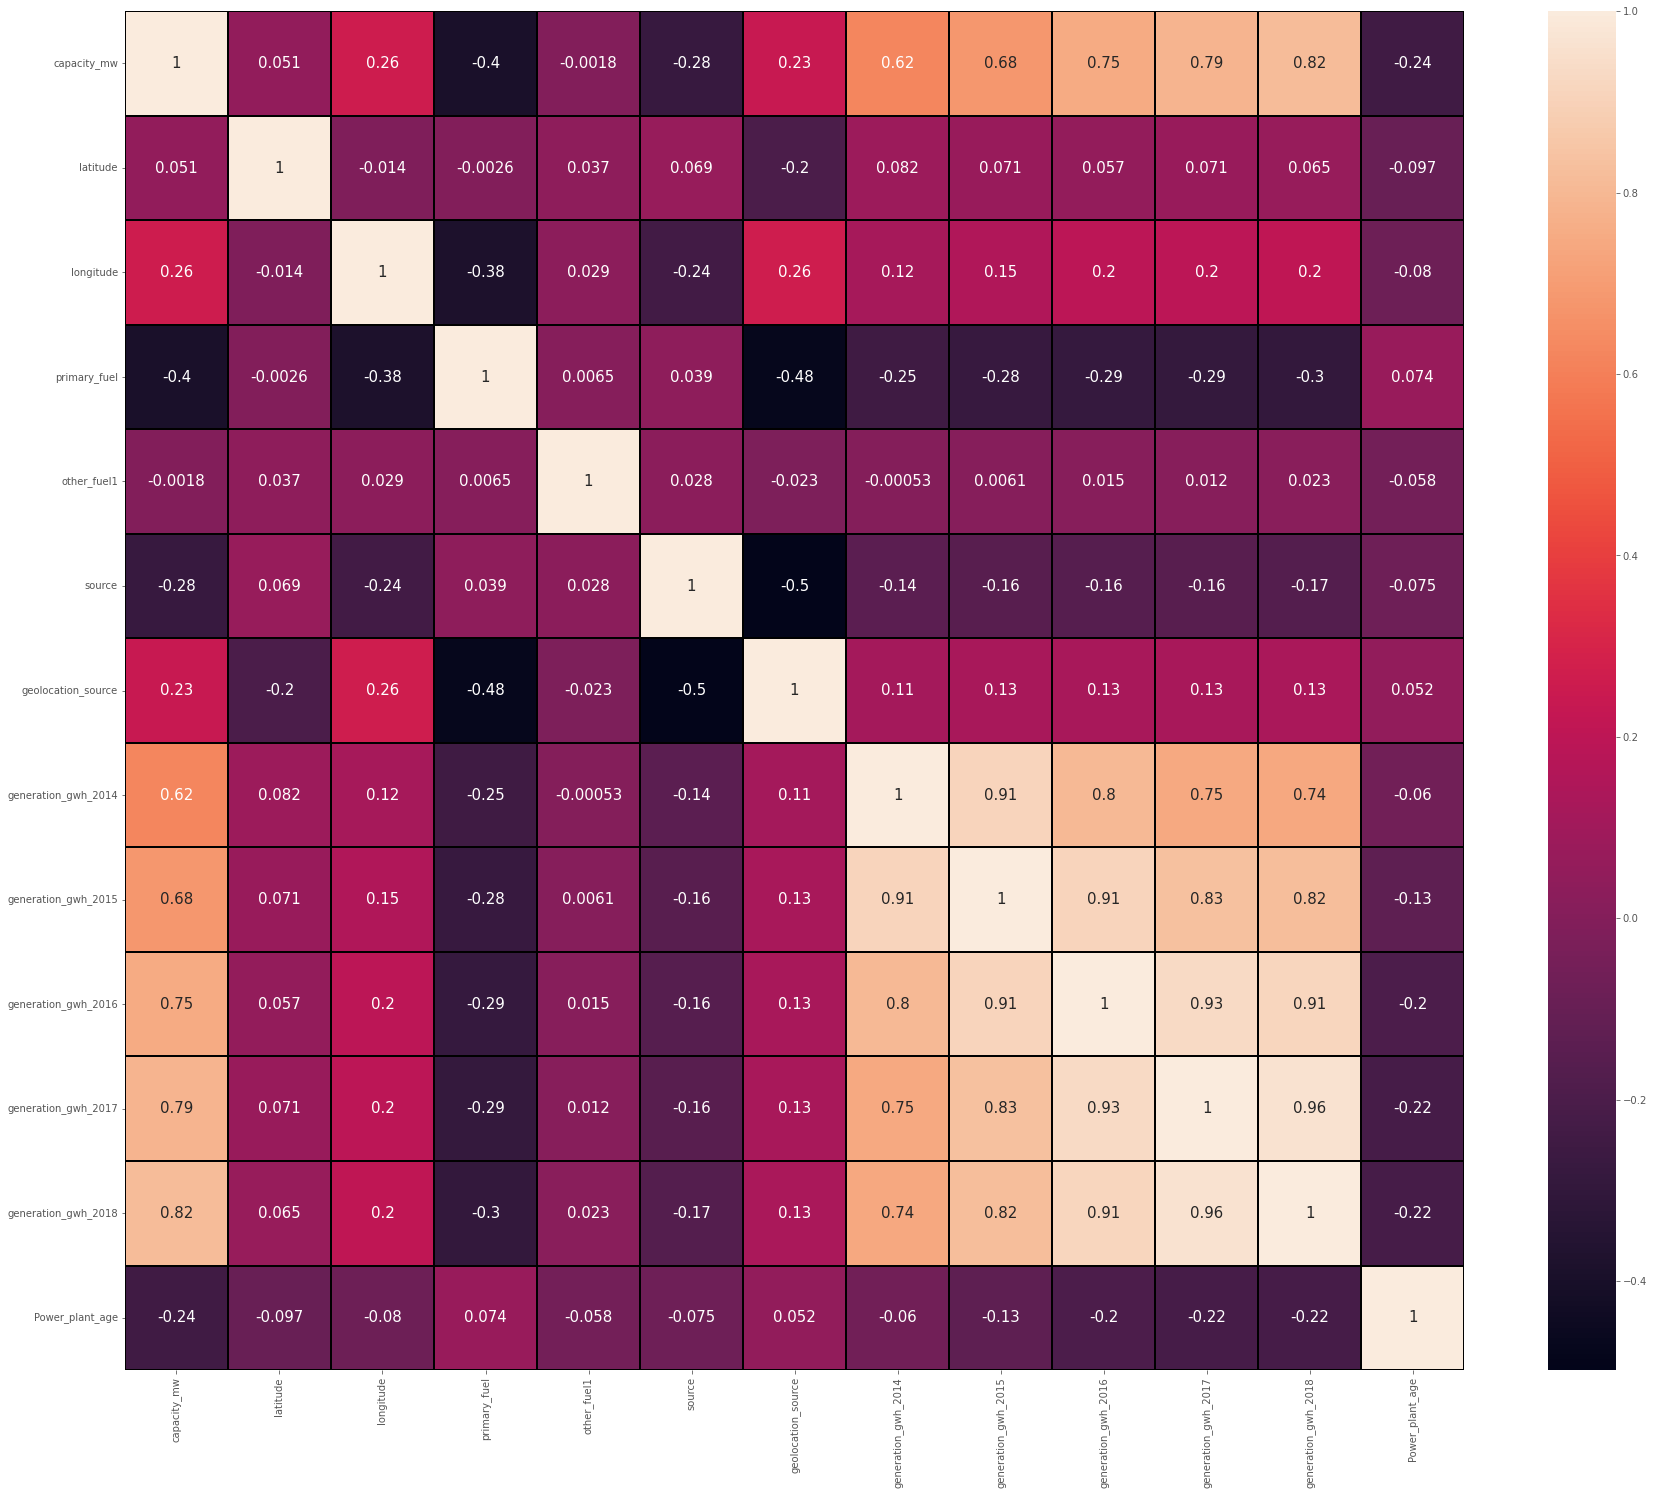

In [189]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True,linecolor='black',fmt='.2g',annot_kws={'size':15},cmap="rocket")
plt.show()

This heatmap shows the correlation matrix. We can visualize the relation between the feature to feature and feature to label.This heatmap contains both positive and negative correlation.

Correlation between capacity_mw and features.


1. The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2018.
And the label is negatively correlated with the features primary_fuel, source and Powe_plant_age.
2. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

Coorelation between primary_fuel and features


1. The label primary_fuel is less correlated with Power_plant_age and source.
2. The label is negatively correlated with geological_source, longitude,capacity_mw, and all generation_gwh years.
3. Also the features other_fuel1 and latitude have very less correlation with both the lables. We can drop these columns.

Visualizing the correlation between label and features using bar plot


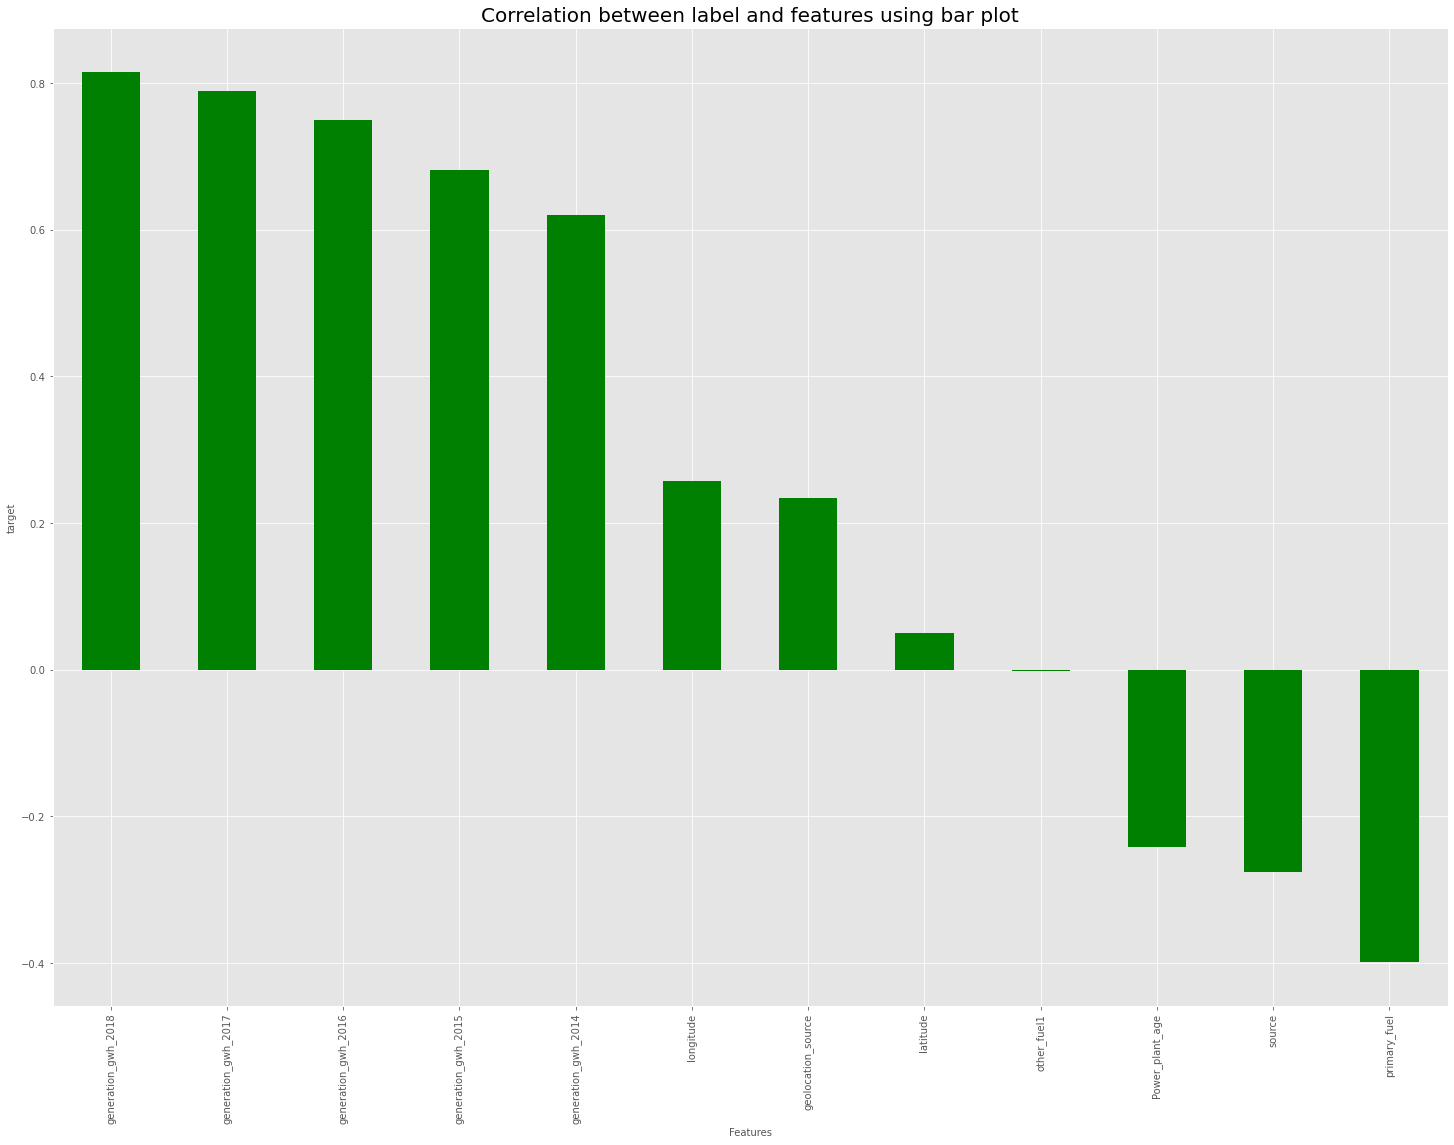

In [190]:
plt.figure(figsize=(25,18))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()


Here we can visualize the positive and negative correlation between the features and the label.



# Visualizing the correlation between the label (primary_fuel) and features using bar plot.


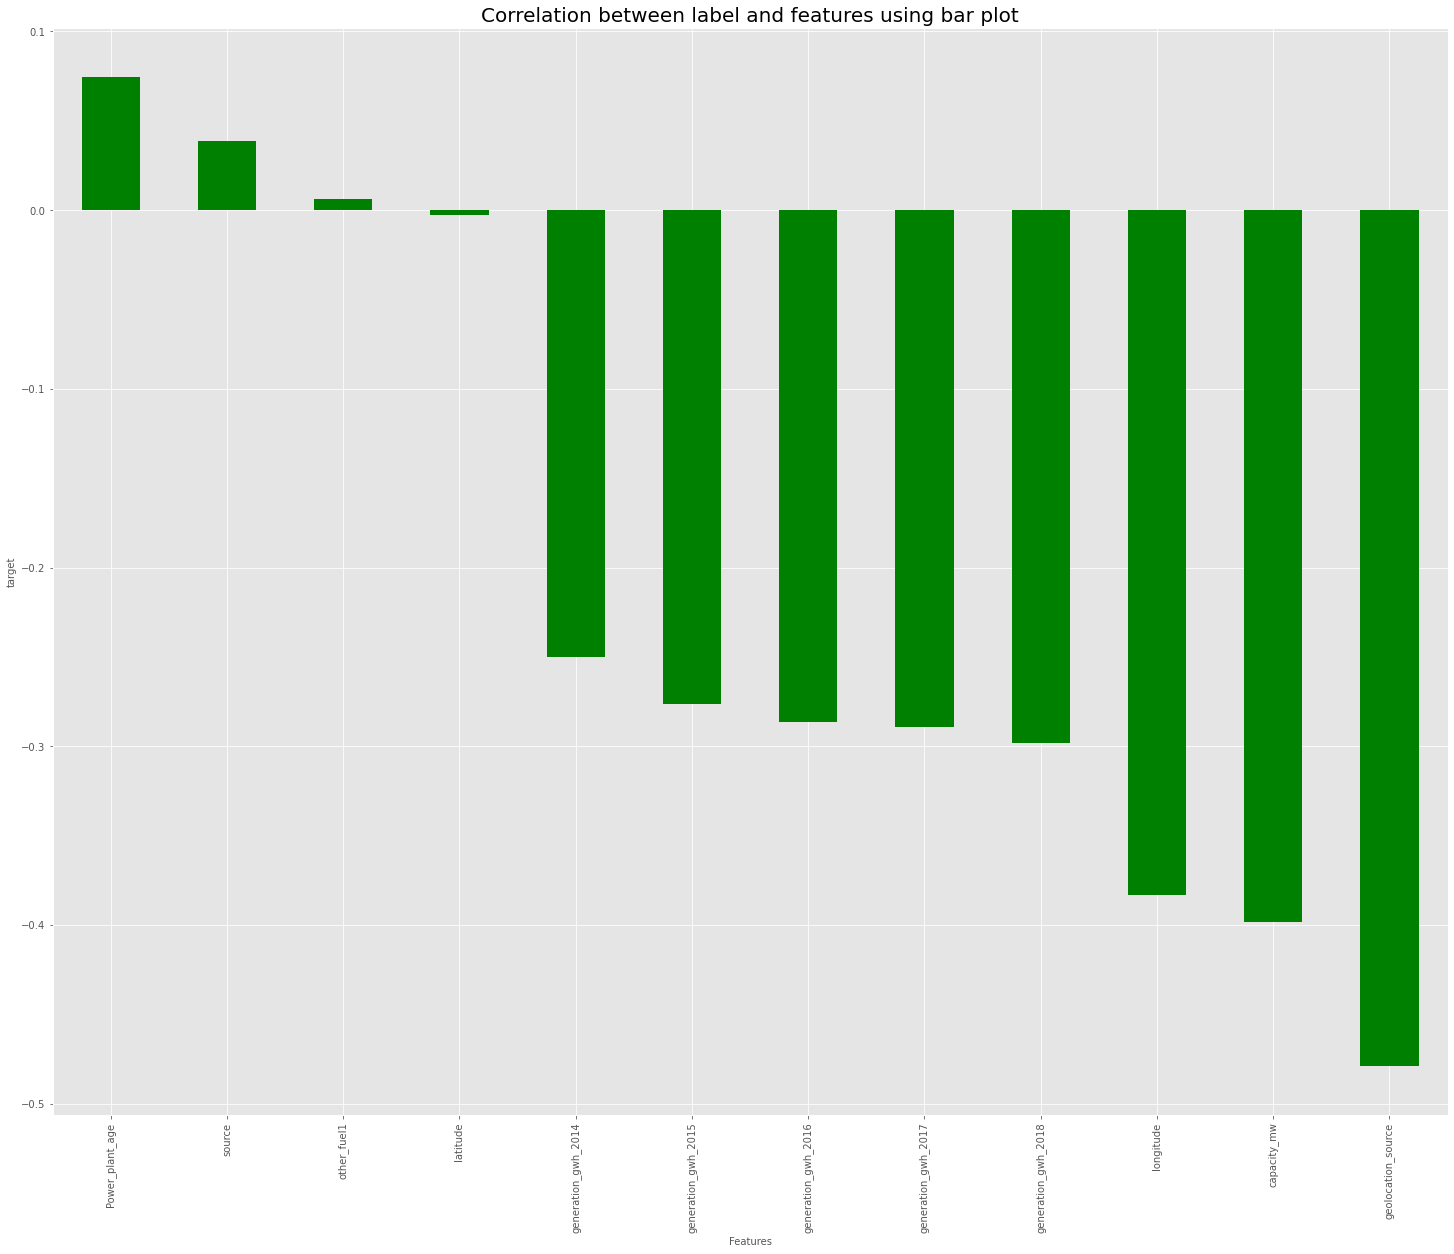

In [191]:
plt.figure(figsize=(25,20))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

Here we can visualize the positive and negative correlation between the features and the label.



From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and primary_fuel. Lets drop these colunms.



In [192]:
# Dropping irrelavant columns
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [193]:
new_df.head()


,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0


This is the dataframe after removing irrelavant columns.



# Prediction for capacity_mw


Separating the features and label


In [194]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [195]:
x.shape


(851, 10)

In [196]:
y.shape


(851,)

# Checking for Skewness


In [197]:
# Checking for skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +0.5 and -0.5.



1. longitude
2. generation_gwh_2018
3. generation_gwh_2014
4. generation_gwh_2015
5. generation_gwh_2016
6. generation_gwh_2017
7. Power_plant_age
Also the column source and geological_source are categorical so no need to remove skewness in these columns.

# Removing skewness using yeo-johnson method


In [200]:
skew = ['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [201]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.099527
1,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.049538
2,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.049538
3,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.247521
4,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.772979


In [202]:
# checking skewness after using yeo-johnson
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.031520
dtype: float64

Removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical columns.



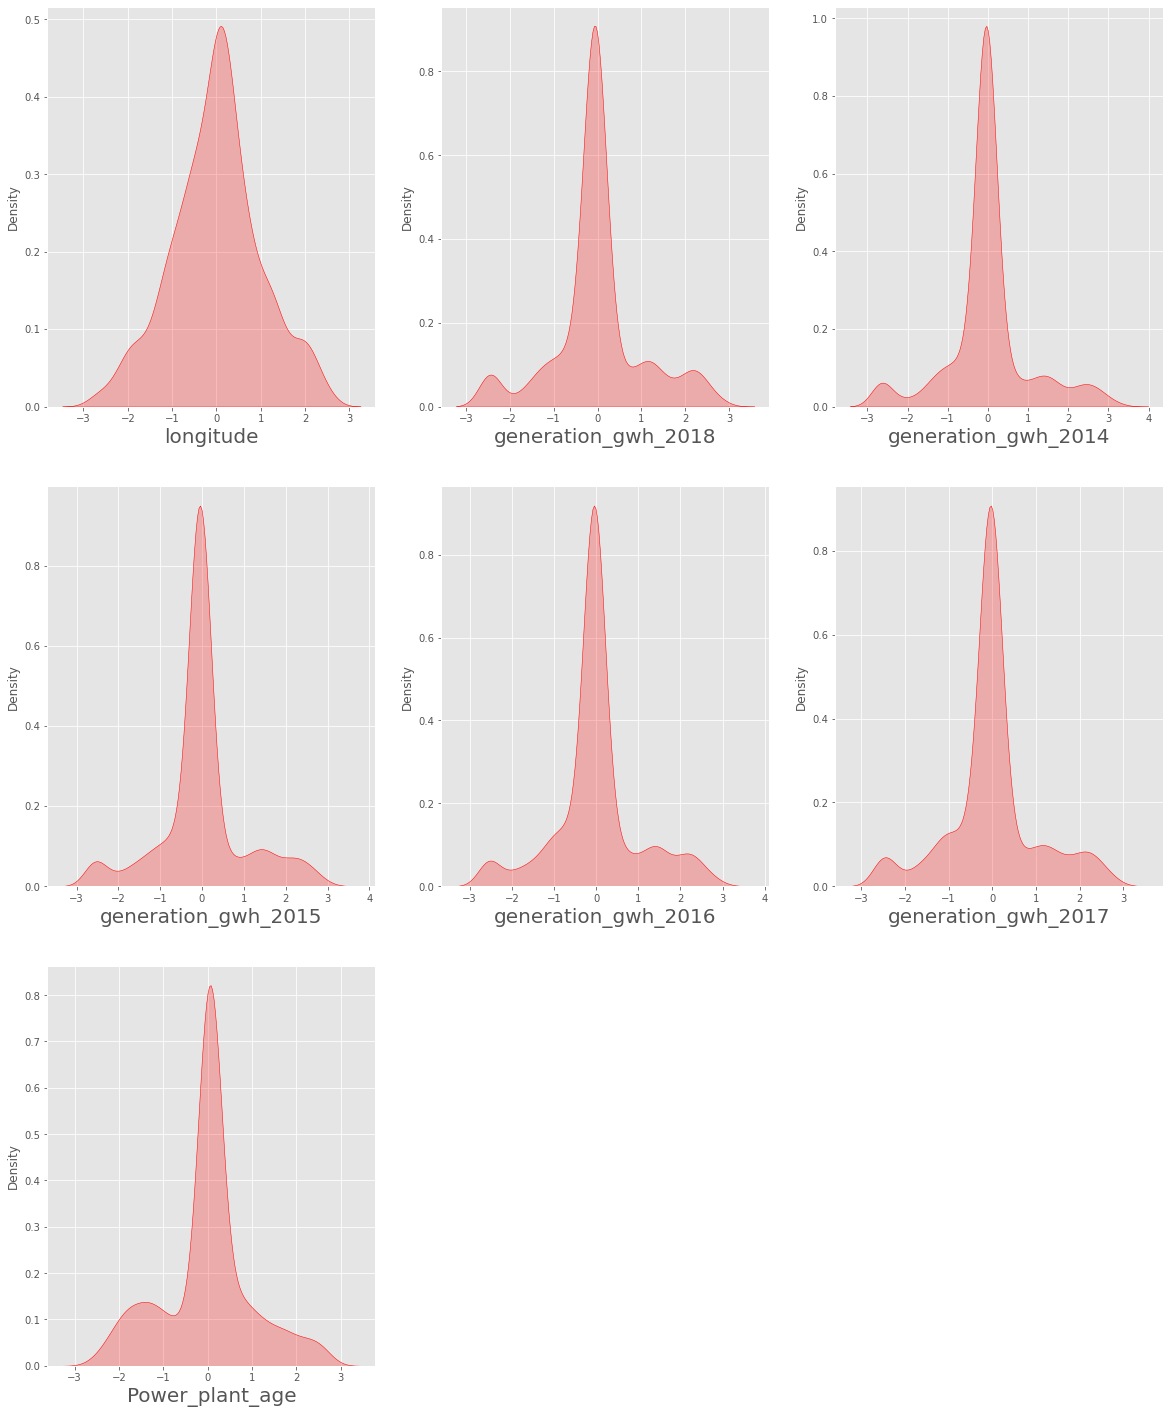

In [203]:
# Checking distribution after removing skewness
plt.figure(figsize=(20,25))
plotnumber=1
for col in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[col],color='r',kde_kws={"shade":True},hist=False)
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been removed in all the columns.



# Feature Scaling using Standard Scalarization


In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983519
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538


The data has been scaled using Standard Scalarization to overcome the problem of data biasness.



# Checking for MultiColinearity


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.310037,longitude
1,1.683037,primary_fuel
2,1.503748,source
3,1.875792,geolocation_source
4,3.605461,generation_gwh_2014
5,6.181777,generation_gwh_2015
6,9.956408,generation_gwh_2016
7,9.749054,generation_gwh_2017
8,8.951163,generation_gwh_2018
9,1.104471,Power_plant_age


Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.



# Modeling


# Finding the best random state


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [207]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.856963889357903 at Random_state 110


We are getting the maximum r2 score as 85% at random state 85.



# Creating new train test split


In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)


# Regression Algorithm


In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

# RandomForestRegressor


In [210]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8571768387610477
MAE: 95.42196509013773
MSE: 31083.849980465395
RMSE: 176.3061257598992


The R2 score value for Random Forest Regressor model is 85%.



# DecisionTreeRegressor


In [211]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.7143196596118243
MAE: 121.94975
MSE: 62175.103575375004
RMSE: 249.34936048719877


The R2 score for Decision Tree Regressor is 72%.



# KNeighbors Regressor


In [212]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE:",metrics.mean_absolute_error(y_test,predknn))
print("MSE:",metrics.mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.7804967687027997
MAE: 115.6884734375
MSE: 47772.40226782438
RMSE: 218.56898743377198


The R2 score uisng KNeighbors Regressor is 78%.



# GradientBoosting Regressor


In [213]:
# Checking R2 score for KNN Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8350310636838012
MAE: 107.14063411124565
MSE: 35903.62811890447
RMSE: 189.4825272126812


The R2 score for GradientBoosting Regressor model is 83%.



# BaggingRegressor


In [214]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8457225166476237
MAE: 101.01289272806187
MSE: 33576.75398226043
RMSE: 183.23960811533195


The R2 score for BaggingRegressor model is 82%.



# Checking the cross validation score


In [215]:
from sklearn.model_selection import cross_val_score


In [216]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7830395148957423


In [217]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.584233888170657


In [218]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7242295398616594


In [219]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7496874388434043


In [220]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7679460669172282


From the above observation, the difference between R2score and the cross validation score we conclude that RandomForestRegressor as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

# Hyper parameter tuning


In [221]:
from sklearn.model_selection import GridSearchCV


In [222]:
# RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [223]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [224]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [225]:
GCV.best_params_


{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

These are the best parameter values for RandomForestRegressor



In [226]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 176.3061257598992
R2_Score: 85.06178020909341


After tuning the model, the R2 score is increased by 1% and we are getting R2 score as 85.81% for RandomForestRegressor which is good.



# Saving the model


In [227]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [228]:
capacity = joblib.load("Global_Power_Plant_capacity_mw.pkl")

In [229]:
import numpy as np
a = np.array(y_test)
predicted = np.array(capacity.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1210.0,1262.629064
1,19.0,32.082891
2,50.4,36.812572
3,18.0,51.416015
4,45.0,101.216789
...,...,...
251,5.0,31.420860
252,4.5,55.396579
253,270.0,194.784072
254,1.0,31.646588


# 2. Prediction for primary_fuel


# Separating features and labels


In [230]:
x_df = new_df.drop("primary_fuel",axis=1)
y_df = new_df["primary_fuel"]

In [231]:
x_df.shape


(851, 10)

In [232]:
y_df.shape


(851,)

# Checking for Skewness


In [233]:
x_df.skew()


capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe skewness in almost all the columns. So except categorical columns, we will remove the skewness of all the rest columns.



# Removing Skewness


In [236]:
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [237]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.099527
1,0.220284,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.049538
2,-0.274381,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.049538
3,0.391670,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.247521
4,1.731859,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.772979


In [238]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.031520
dtype: float64

We have removed the skewness from all numerical columns.



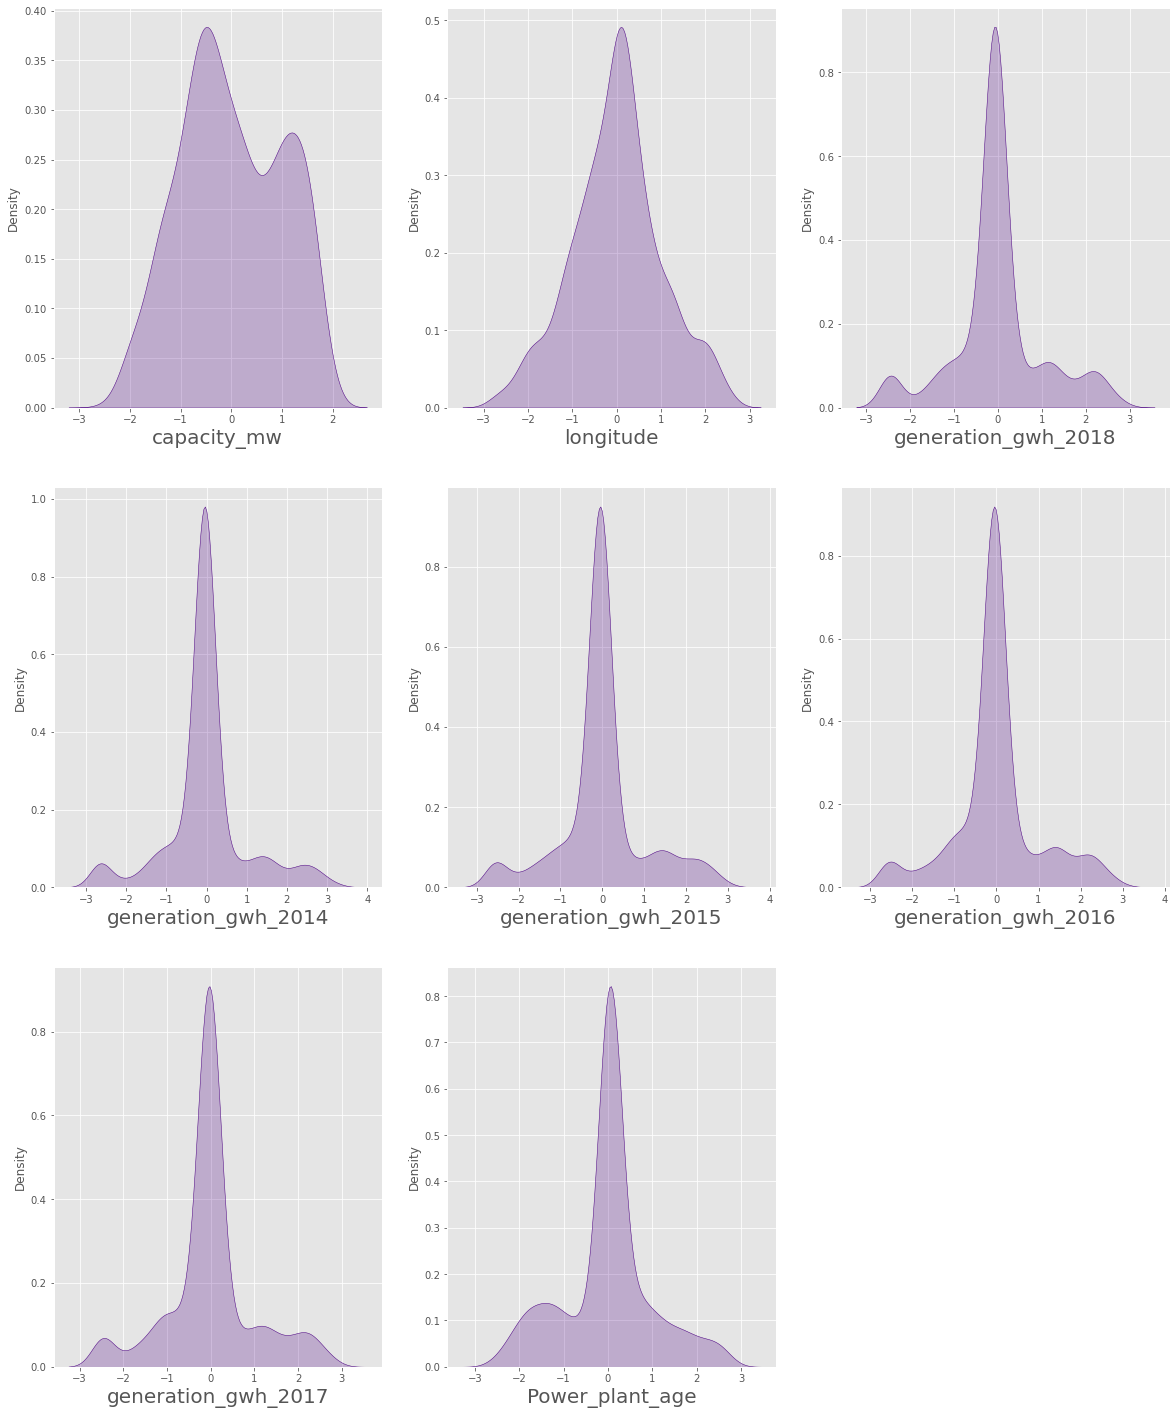

In [239]:
# Visualizing the distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The data is not normal but we can notice the skeweness has been removed.



# Feature Scaling


In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df),columns = x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983519
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538


We have scaled the data using Standard Scalarization to overcome the issue of Data biasness.



# Checking Multicolinearity


In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.813615,capacity_mw
1,1.193754,longitude
2,1.412982,source
3,1.590963,geolocation_source
4,3.624141,generation_gwh_2014
5,6.190260,generation_gwh_2015
6,9.960006,generation_gwh_2016
7,9.765728,generation_gwh_2017
8,8.960848,generation_gwh_2018
9,1.156613,Power_plant_age


The VIF value is less than 10 in all the columns which means no multicolinearity issue.



In [242]:
y_df.value_counts()


1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

1. Here we can observe that the target variabe primary_fuel has multiclasses which means it is a multiclassification problem.
2. Also the data is not balanced so we will use oversampling method to balance the data.

# OverSampling


In [243]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df,y_df = SM.fit_resample(x_df,y_df)

In [244]:
y_df.value_counts()


6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

Since the highest count of the target is 240 so the data is balanced by oversampling all the classes to the count 240.



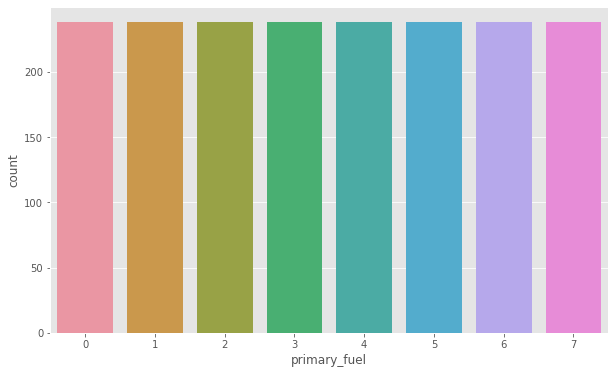

In [245]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

Here we can clearly visualize the data in all the types are eqaul.



In [246]:
# DataFrame after preprocessing and data cleaning
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979


This is the dataframe after preprocessing the data.



# Modeling


# Finding the best random state


In [247]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc = accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.8933566433566433 at random_state 15


# Creating train_test_split


In [248]:
 x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=maxRS)


We have now splitted the data using the random state which is providing best accuracy.



# Classification Algorithms


In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# DecisionTreeClassifier


In [250]:
# Checking Accuracy for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)
predDTC = DTC.predict(x_df_test)
print(accuracy_score(y_df_test,predDTC))
print(confusion_matrix(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))

0.8898601398601399
[[69  2  0  0  0  2  0  0]
 [ 3 56  3  3  2  4  0  0]
 [ 2  7 50  8  0  3  0  0]
 [ 0  3  3 59  2  0  0  0]
 [ 0  7  1  3 59  1  0  0]
 [ 0  4  0  0  0 56  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.71      0.79      0.75        71
           2       0.88      0.71      0.79        70
           3       0.81      0.88      0.84        67
           4       0.94      0.83      0.88        71
           5       0.85      0.93      0.89        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.89       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.89      0.89      0.89       572



We are getting 88% accuracy using DecisionTreeClassifier.



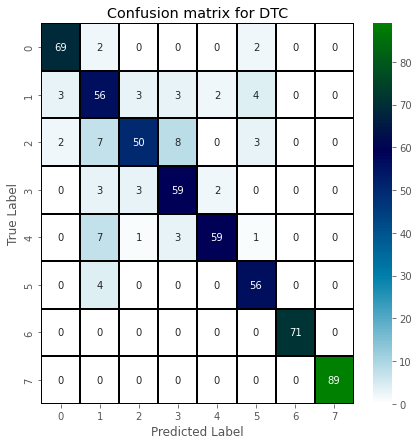

In [252]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

# RandomForestClassifier


In [253]:
# Checking Accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)
predRFC = RFC.predict(x_df_test)
print(accuracy_score(y_df_test,predRFC))
print(confusion_matrix(y_df_test,predRFC))
print(classification_report(y_df_test,predRFC))

0.9178321678321678
[[71  2  0  0  0  0  0  0]
 [ 5 55  1  4  3  3  0  0]
 [ 2  3 54  7  0  4  0  0]
 [ 0  4  2 58  2  1  0  0]
 [ 0  0  0  0 70  1  0  0]
 [ 0  2  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        73
           1       0.83      0.77      0.80        71
           2       0.93      0.77      0.84        70
           3       0.84      0.87      0.85        67
           4       0.93      0.99      0.96        71
           5       0.86      0.95      0.90        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.92       572
   macro avg       0.91      0.92      0.91       572
weighted avg       0.92      0.92      0.92       572



The RandomForestClassifier has accuracy 90%.



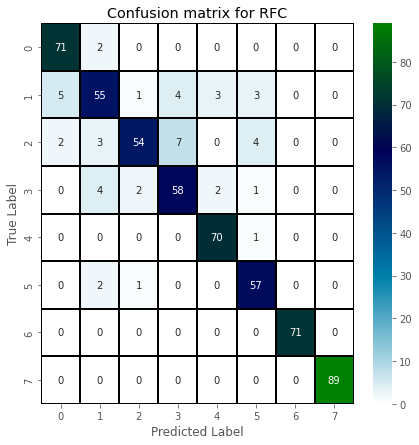

In [254]:
# Lets plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RFC")
plt.show()

# Support Vector Machine Classifier


In [255]:
# Checking Accuracy for SVC
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test,predsvc))
print(confusion_matrix(y_df_test,predsvc))
print(classification_report(y_df_test,predsvc))

0.8199300699300699
[[62  0  0  0  0  1  0 10]
 [ 9 36  3  1 13  1  0  8]
 [ 1  2 43  6  5 10  0  3]
 [ 0  3  7 44  4  0  0  9]
 [ 0  0  0  0 71  0  0  0]
 [ 2  2  0  0  0 54  0  2]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  1  0  0  0  0 88]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        73
           1       0.84      0.51      0.63        71
           2       0.80      0.61      0.69        70
           3       0.86      0.66      0.75        67
           4       0.76      1.00      0.87        71
           5       0.82      0.90      0.86        60
           6       1.00      1.00      1.00        71
           7       0.73      0.99      0.84        89

    accuracy                           0.82       572
   macro avg       0.83      0.81      0.81       572
weighted avg       0.83      0.82      0.81       572



The accuracy score using svc is 81%.



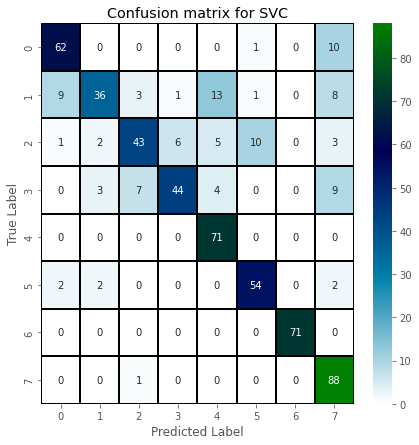

In [257]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVC")
plt.show()

# KNeighborsClassifier


In [258]:
# Checking Accuracy for KNeighborsClassifier
knn = KNN()
knn.fit(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)
print(accuracy_score(y_df_test,predknn))
print(confusion_matrix(y_df_test,predknn))
print(classification_report(y_df_test,predknn))

0.8496503496503497
[[68  2  0  0  0  0  0  3]
 [ 7 36  6  2 11  3  0  6]
 [ 2  2 50  6  0  5  0  5]
 [ 0  1  8 49  2  1  0  6]
 [ 0  0  1  1 67  2  0  0]
 [ 2  0  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  1  0 88]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        73
           1       0.88      0.51      0.64        71
           2       0.76      0.71      0.74        70
           3       0.84      0.73      0.78        67
           4       0.84      0.94      0.89        71
           5       0.83      0.95      0.88        60
           6       1.00      1.00      1.00        71
           7       0.81      0.99      0.89        89

    accuracy                           0.85       572
   macro avg       0.85      0.85      0.84       572
weighted avg       0.85      0.85      0.84       572



Accuracy_score using KNN is 84%.



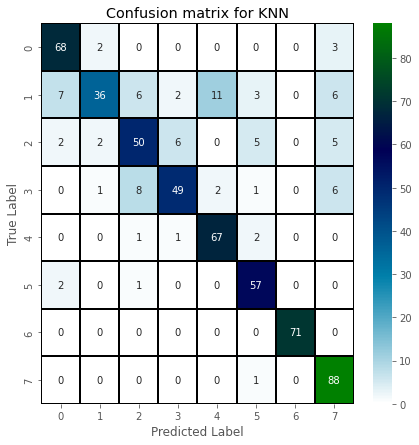

In [259]:
# Lets plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()

# GradientBoostingClassifier


In [260]:
# Checking Accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)
predGB = GB.predict(x_df_test)
print(accuracy_score(y_df_test,predGB))
print(confusion_matrix(y_df_test,predGB))
print(classification_report(y_df_test,predGB))

0.9055944055944056
[[71  2  0  0  0  0  0  0]
 [ 5 57  1  3  2  3  0  0]
 [ 1  5 50  9  0  5  0  0]
 [ 0  5  2 57  2  1  0  0]
 [ 0  0  0  3 67  1  0  0]
 [ 0  3  1  0  0 56  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.79      0.80      0.80        71
           2       0.93      0.71      0.81        70
           3       0.79      0.85      0.82        67
           4       0.94      0.94      0.94        71
           5       0.85      0.93      0.89        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.91       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.91      0.91      0.90       572



The accuracy score using GradientBoostingClassifier is 90%.



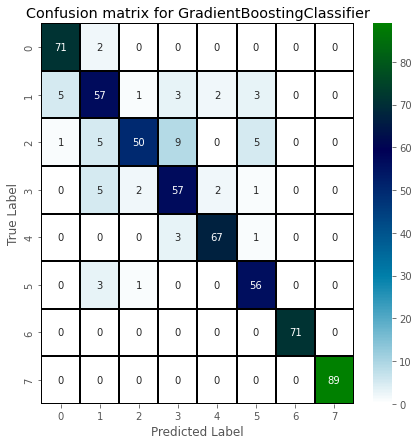

In [261]:
# Lets plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_df_test,predGB)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for GradientBoostingClassifier")
plt.show()

# BaggingClassifier

In [262]:
# Checking Accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)
predBC = BC.predict(x_df_test)
print(accuracy_score(y_df_test,predBC))
print(confusion_matrix(y_df_test,predBC))
print(classification_report(y_df_test,predBC))

0.9108391608391608
[[71  1  0  0  0  1  0  0]
 [ 2 52  4  2  6  5  0  0]
 [ 1  3 55  6  0  5  0  0]
 [ 0  4  2 59  2  0  0  0]
 [ 0  2  0  1 67  1  0  0]
 [ 0  2  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.81      0.73      0.77        71
           2       0.89      0.79      0.83        70
           3       0.87      0.88      0.87        67
           4       0.89      0.94      0.92        71
           5       0.83      0.95      0.88        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.91      0.91       572



The accuracy score using BaggingClassifier is 89%.



In [ ]:
# Lets plot confusion matrix for BaggingClassifier
cm = confusion_matrix(y_df_test,predBC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for BaggingClassifier")
plt.show()

# Checking the cross Validation Score


In [264]:
from sklearn.model_selection import cross_val_score


In [265]:
# cv score for DecisionTreeClassifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.8618731869042685


In [266]:
# cv score for RandomForestClassifier
print(cross_val_score(RFC,x_df,y_df,cv=5).mean())

0.9175424782428511


In [267]:
# cv score for SVC
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7951623152369112


In [268]:
# cv score for KNNClassifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.8566279872910624


In [269]:
# cv score for GradientBoostingClassifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.8965354330708661


In [270]:
# cv score for BaggingClassifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.8933789197402955


# Differece between accuracy_score and cross_validation_score for the models used.


1. DecisionTreeClassifier = 1.8
2. RandomForestClassifier = 0.61
3. SVC = 0.39
4. KNNClassifier = 1.13
5. GradientBoostingClassifier = 0.16
6. BaggingClassifier = 2.1
7. The difference between accuracy score and cross validation score of Gradient Boosting Classifier is which is very less compared to other models. So we can conclude that Gradient Boosting Classifier as our best fitting model

# Hyperparameter tuning


In [271]:
from sklearn.model_selection import GridSearchCV


In [272]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [273]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)


In [274]:
GCV.fit(x_df_train,y_df_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [275]:

primary_fuel = GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_df_train, y_df_train)
pred = primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

91.43356643356644


The accuracy of the best model is increased by 2% after tuning and giving 91.43% accuracy which is good.



# Plotting ROC and compare AUC for the final model


Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.



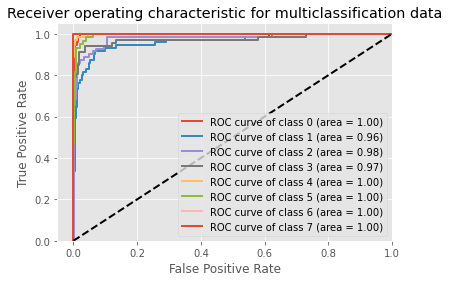

In [276]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()


This is the AUC-ROC curve for the final model and is plotted False positive rate against True positive rate. Here we can observe the area of all the fuel types.



# Saving the model


In [277]:
# Saving the model using .pkl
import joblib
joblib.dump(primary_fuel,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

# Conclusion


1. The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 85.76%.
2. The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 91.43%.

In [278]:
model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')


In [279]:
import numpy as np
a = np.array(y_df_test)
predicted = np.array(model.predict(x_df_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,5,5
1,3,3
2,6,6
3,7,7
4,5,5
...,...,...
567,5,5
568,2,5
569,6,6
570,0,0
